In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [6]:
alldata = pd.concat([train,test])
alldata['datetime'] = pd.to_datetime(alldata['datetime'])
alldata['Hour'] = alldata['datetime'].dt.hour
alldata['Year'] = alldata['datetime'].dt.year
alldata['Month'] = alldata['datetime'].dt.month
alldata['Quarter'] = alldata['datetime'].dt.quarter
alldata['DOW'] = alldata['datetime'].dt.weekday
alldata['Day'] = alldata['datetime'].dt.day

In [7]:
alldata.head()

,ID,datetime,electricity_consumption,pressure,temperature,var1,var2,windspeed,Hour,Year,Month,Quarter,DOW,Day
0,0,2013-07-01 00:00:00,216.0,1003.0,-11.4,-17.1,A,571.910,0,2013,7,3,0,1
1,1,2013-07-01 01:00:00,210.0,996.0,-12.1,-19.3,A,575.040,1,2013,7,3,0,1
2,2,2013-07-01 02:00:00,225.0,1000.0,-12.9,-20.0,A,578.435,2,2013,7,3,0,1
3,3,2013-07-01 03:00:00,216.0,995.0,-11.4,-17.1,A,582.580,3,2013,7,3,0,1
4,4,2013-07-01 04:00:00,222.0,1005.0,-11.4,-19.3,A,586.600,4,2013,7,3,0,1


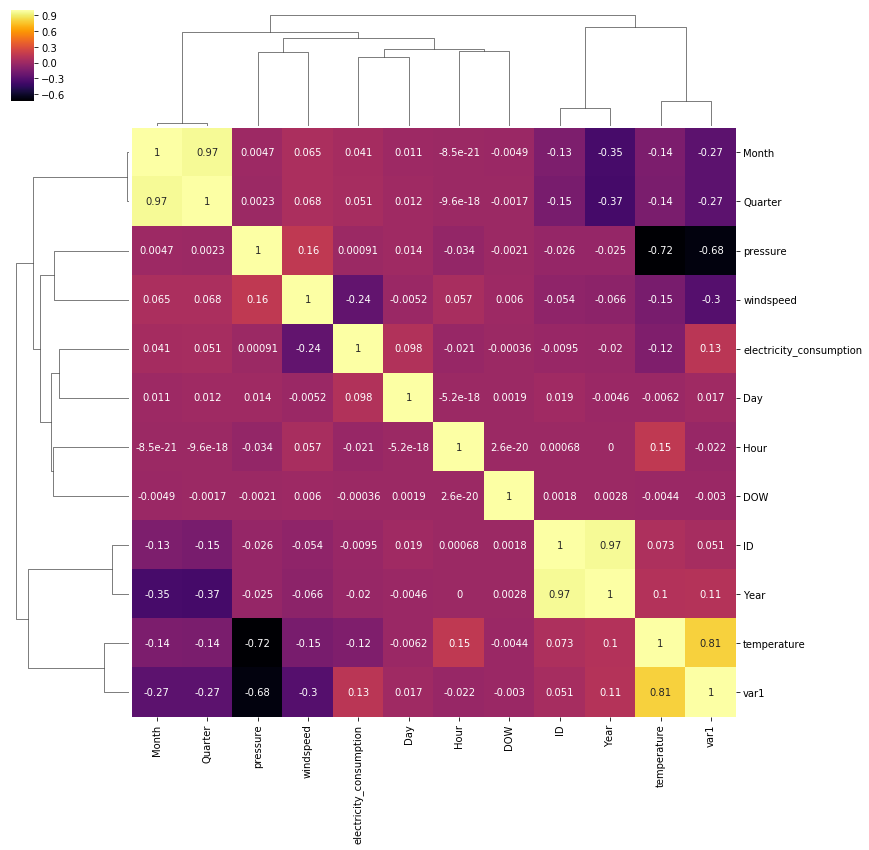

In [8]:
sns.clustermap(alldata.corr() , cmap = 'inferno',figsize=(13,13), annot = True)

The first thing to notice in this beautiful color clusermap is the square grids of correlations. Clearly the **var1** and the **temperature** has direct correlation of 81%.

As this is an anonomized variable, we cannot draw direct conclusion but a right question and explain this anonymized thingy!

** What Physical/Electrical properties are directly proportional to the temperature?** and does this have something to do with OHMS LAW. We shall explore further in detail...


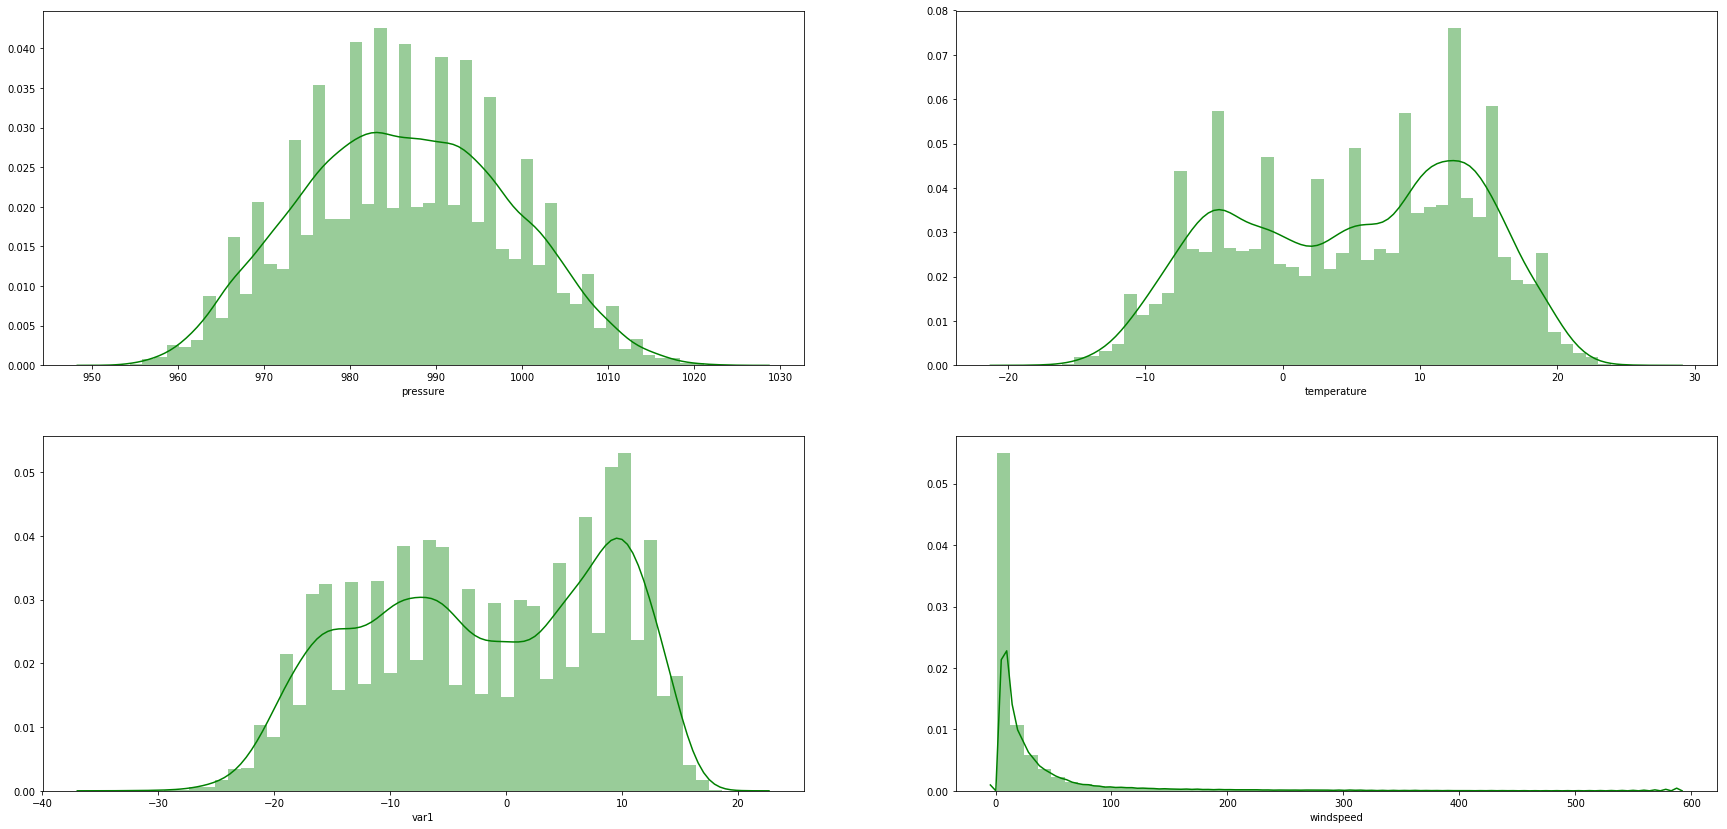

In [9]:
cols = ['pressure', 'temperature',
       'var1','windspeed']
plt.figure(figsize=(30,30))
for i, c in enumerate(cols):
    ax = plt.subplot(4,2,i+1)
    sns.distplot(alldata[c], color='g')

I absolutely love the **Seaborn**, moving apart from my personal taste we could clearly see... The pressure has normal distribution, the temperature peaks at **15** value and surprisingly the **var1** follows the same distribution. The windspeed is clearly between 0 -100 with max of them at lower side. 

## Things to take from the plot-
1. Remember I being physic professor in the last graph of some relation with var1 and temperature. Here we can safely conclude that it isn't **resistance, or voltage** as it varies from - to + values. It can be some very complex - resistivity or sensitivity related too.
2. The varing -10 to +20 of both var1 and temperature are the clear signs of them being some temperature values in celsius scale and 15 degrees being max makes it more obvious.
3. Windspeeds are moderate, so we are not on the top of himalayas here. So, this might be some hill station or some hilly area with normal pressure distribution

## Lets look into var2

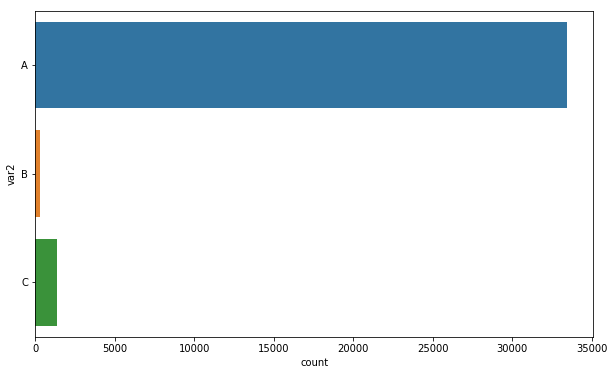

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(y= alldata['var2'])

We are having a huge number of As here and followed by C and B. This are clearly anonymized well :). TODO: Test  both categorical dummy values and label encode them to see what our model understands well.

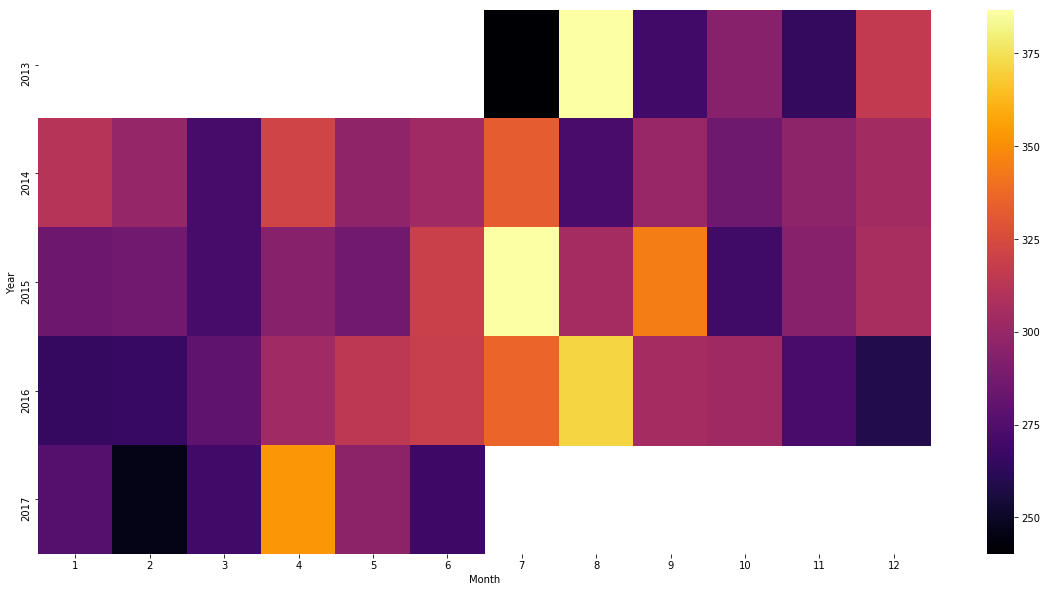

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(alldata.pivot_table(values='electricity_consumption',
                                index='Year', columns='Month') , cmap='inferno')

### **Make sure that its a time forward splits. Making a note that 2013 and 7th month is the initial start and the code do reflects this initial condition at 2013**

Lets focus on the Day, Hour and Day of Week wise Heatmaps.

## Hour and Day

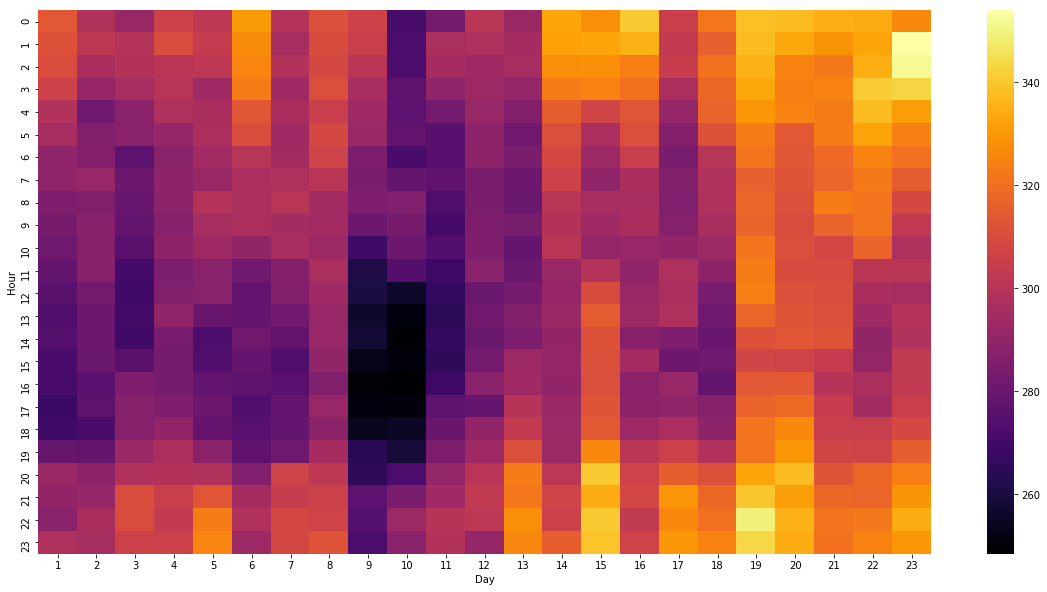

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(alldata.pivot_table(values='electricity_consumption', index='Hour',columns='Day') ,cmap='inferno',)

Ahaa! There a significant consumption in the evening times than compared to the day. Make sense as lights are turned on, people start to watch never ending TV serials on the repeat mode. And, how could we forget parties and celebrations! 

**It would be good to make a day time feature which indicates morning, noon, evening and late night...**

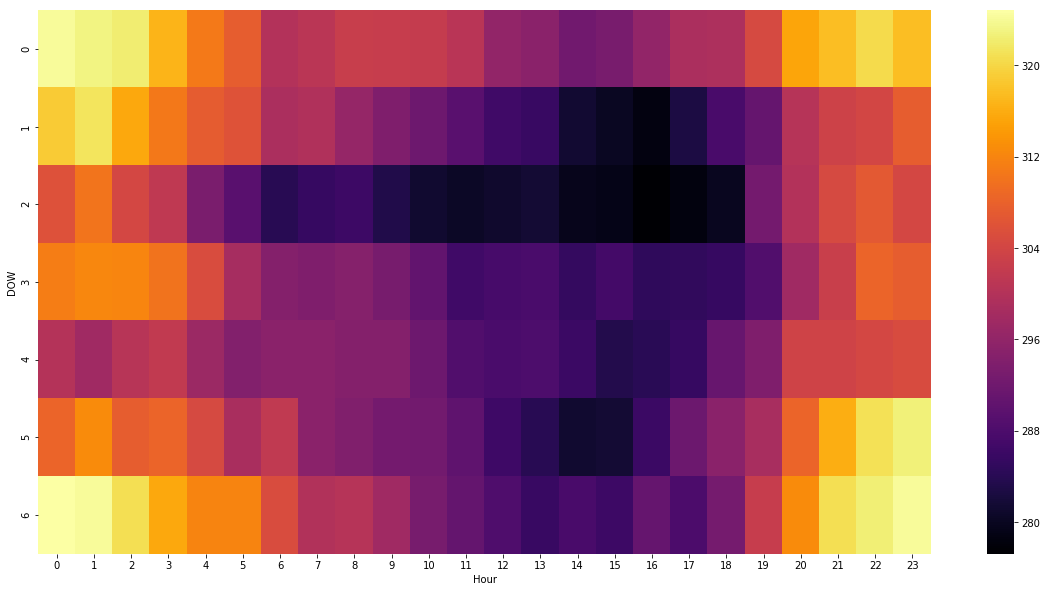

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(alldata.pivot_table(values='electricity_consumption', index='DOW',columns='Hour') ,cmap='inferno',)

Wow! Looks cools and I imagined this trend in the eye of my brain. Saw similar trend on the **Student Hunt Hackhathon** on AV.
Looks like we can make two more features here...

1. Weekend Proximity/Flag
2. Holidays Flag

Time for some Time series analysis

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


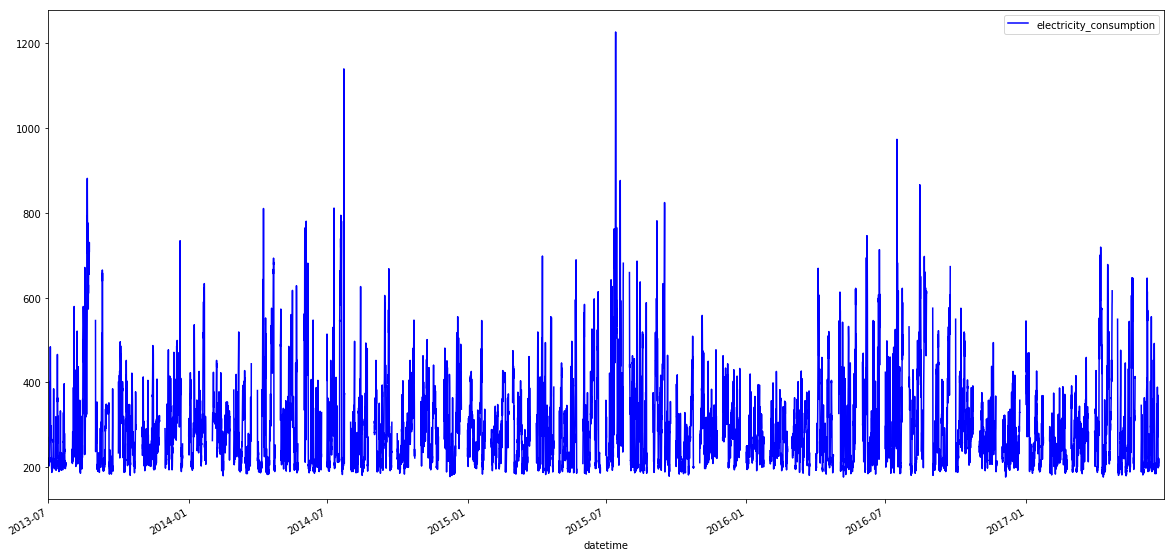

In [27]:
# Conveting datetime as index
rollmean = alldata[['datetime','electricity_consumption']].set_index('datetime')
l2 = pd.rolling_mean(rollmean, window=3).plot(figsize=(20,10), color='b')

There is a spike at the 7 month in the 2015 and the rest of the rolling mean pretty much is symmerical about y at the quarter interval time. Lets add some grouby features in the code script to get better prediction results